## Esercizio Classificazione NLP3 - Disaster Twitter Prediction



<img src="https://frenzy86.s3.eu-west-2.amazonaws.com/python/disaster.jpg" width="1200">

In [27]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

path = 'https://frenzy86.s3.eu-west-2.amazonaws.com/python/twitter_train.csv'
df = pd.read_csv(path)
df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [28]:
# STEP1 DEFINIRE ED APPLICARE LA REGEX
df = pd.read_csv(path)

patterns = {
            r'\s+': ' ',            # prima e dopo come ultima sostituisce tutti i multipli spazi con uno spazio
            #r'......': '',          
            #r'......': '',         #aggiungere nuove regex qui
            r'\d+': '',             # remove digits (numeri)
            r'[^\w\s]': '',         # remove punteggiatura e simboli ...,'@!£$%
            r'\b\w{1,2}\b':'',      # remove all token less than2 characters
            r'(http|www)[^\s]+':'', # remove website
            r'\s+': ' '             # sostituisce tutti i multipli spazi con uno spazio
            }

words_to_remove = ['gargamella', 'doggy', 'word3']  # List of words to remove

# Add a new pattern to remove specific words
word_pattern = r'\b(?:{})\b'.format('|'.join(words_to_remove))
patterns[word_pattern] = ''

def clean_column(df, column, patterns):
    for pattern, replacement in patterns.items():
        df[column] = df[column].str.replace(pattern, replacement)
        df[column] = df[column].str.lower() # applica il lower
    return df

#solo in preview
clean_column(df, 'text', patterns)

,id,keyword,location,text,target
0,1,NaN,NaN,our deeds are the reason this earthquake may a...,1
1,4,NaN,NaN,forest fire near ronge sask canada,1
2,5,NaN,NaN,all residents asked shelter place are being no...,1
3,6,NaN,NaN,people receive wildfires evacuation orders ca...,1
4,7,NaN,NaN,just got sent this photo from ruby alaska smok...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,two giant cranes holding bridge collapse into ...,1
7609,10870,NaN,NaN,aria_ahrary thetawniest the out control wild f...,1
7610,10871,NaN,NaN,utckm volcano hawaii,1
7611,10872,NaN,NaN,police investigating after ebike collided with...,1


In [29]:
# applico la regex
df = clean_column(df, 'text', patterns)
df

,id,keyword,location,text,target
0,1,NaN,NaN,our deeds are the reason this earthquake may a...,1
1,4,NaN,NaN,forest fire near ronge sask canada,1
2,5,NaN,NaN,all residents asked shelter place are being no...,1
3,6,NaN,NaN,people receive wildfires evacuation orders ca...,1
4,7,NaN,NaN,just got sent this photo from ruby alaska smok...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,two giant cranes holding bridge collapse into ...,1
7609,10870,NaN,NaN,aria_ahrary thetawniest the out control wild f...,1
7610,10871,NaN,NaN,utckm volcano hawaii,1
7611,10872,NaN,NaN,police investigating after ebike collided with...,1


In [30]:
mapping = {0:'Disaster',1:'Not a Disaster'}
df['target'] = df['target'].map(mapping)

In [31]:
df['text'].head(10)

0    our deeds are the reason this earthquake may a...
1                   forest fire near ronge sask canada
2    all residents asked shelter place are being no...
3     people receive wildfires evacuation orders ca...
4    just got sent this photo from ruby alaska smok...
5    rockyfire update california hwy closed both di...
6    flood disaster heavy rain causes flash floodin...
7              top the hill and can see fire the woods
8    theres emergency evacuation happening now the ...
9              afraid that the tornado coming our area
Name: text, dtype: object

In [54]:
text_disaster = list(map(str, df[df['target']=='Disaster']['text']))
text_disaster = ''.join(text_disaster)

text_nodisaster = list(map(str, df[df['target']=='Not a Disaster']['text']))
text_nodisaster = ''.join(text_nodisaster)

(-0.5, 799.5, 399.5, -0.5)

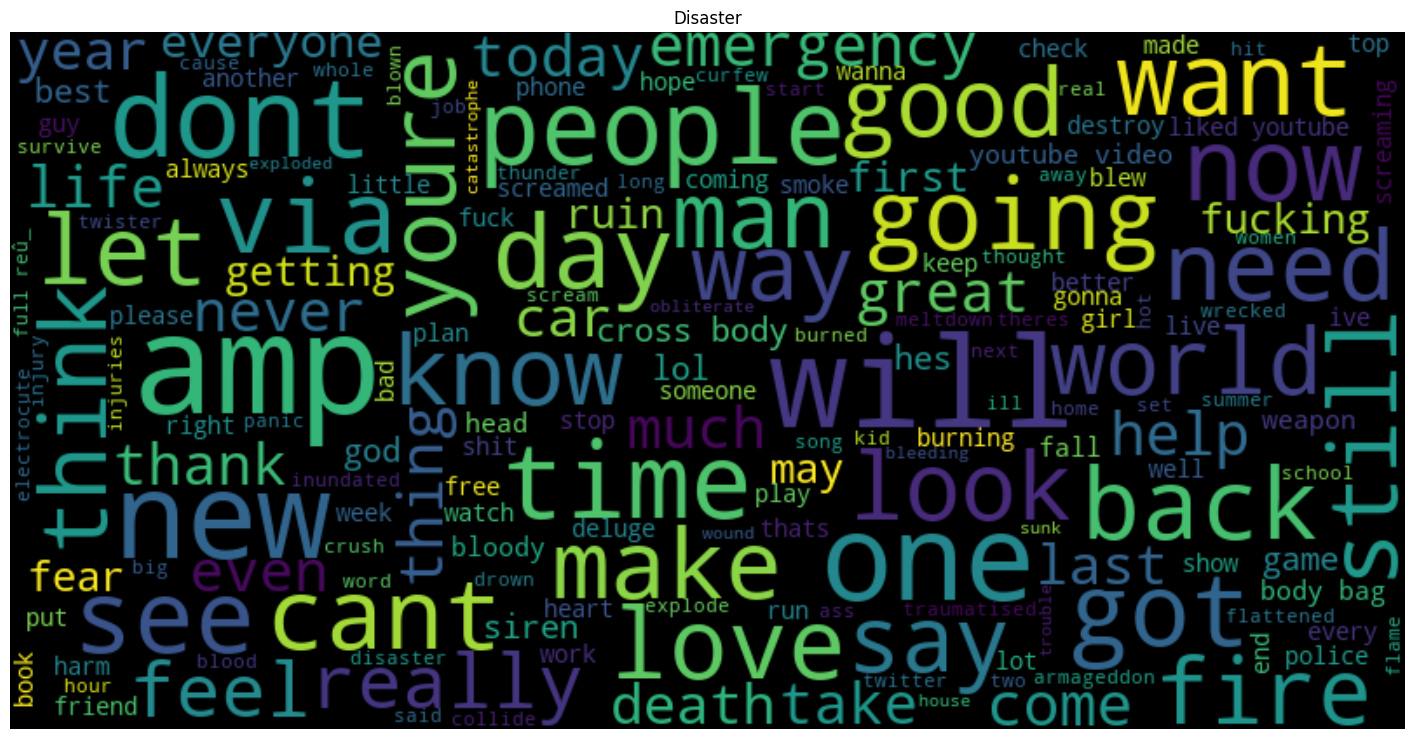

In [55]:
## STEP 2 : EDA con WORDCLOUD
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wordcloud = WordCloud(background_color = 'black', width = 800, height = 400,
                      max_words = 180, contour_width = 3,
                      max_font_size = 80, contour_color = 'steelblue',
                      stopwords = STOPWORDS, random_state = 667)

wordcloud.generate(text_disaster)

plt.figure(figsize=(18,10))
plt.title('Disaster')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")

(-0.5, 799.5, 399.5, -0.5)

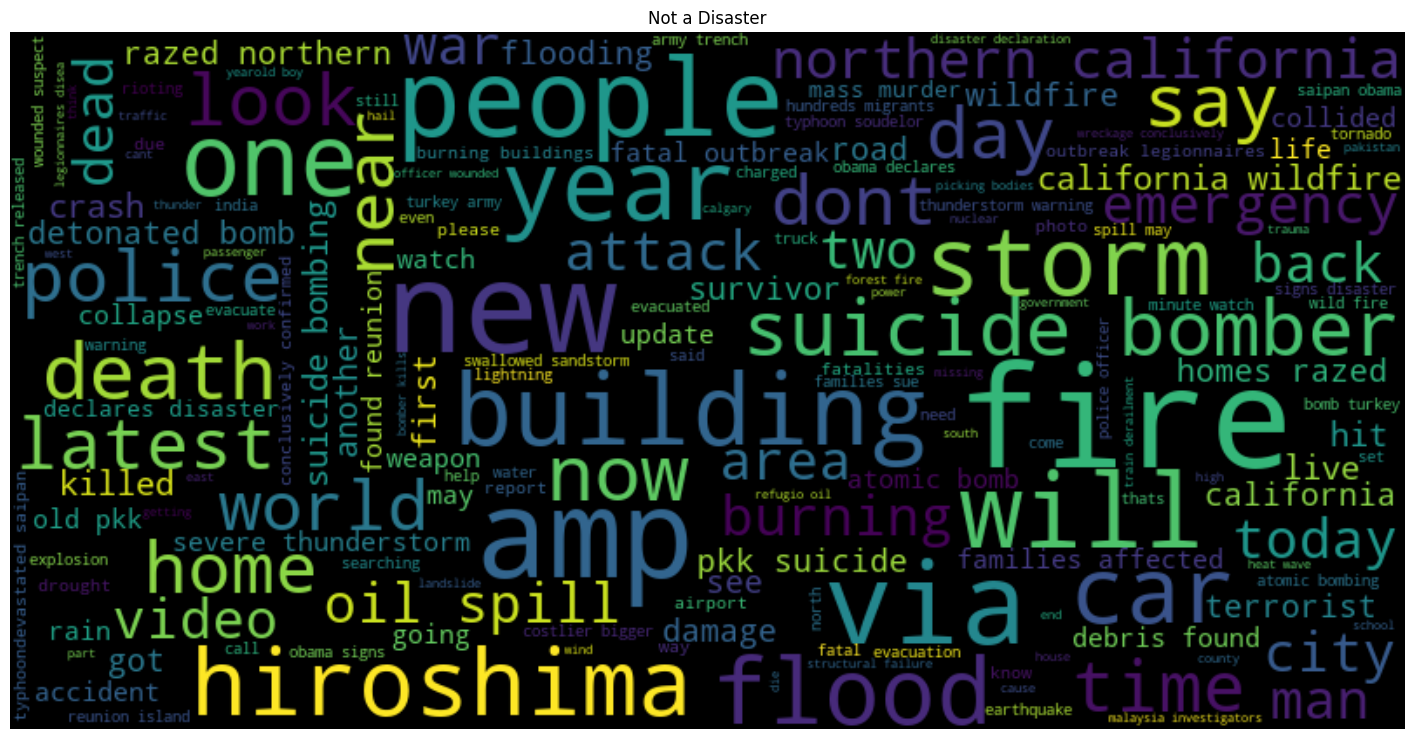

In [56]:
## STEP 2 : EDA con WORDCLOUD
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wordcloud = WordCloud(background_color = 'black', width = 800, height = 400,
                      max_words = 180, contour_width = 3,
                      max_font_size = 80, contour_color = 'steelblue',
                      stopwords = STOPWORDS, random_state = 667)

wordcloud.generate(text_nodisaster)

plt.figure(figsize=(18,10))
plt.title('Not a Disaster')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")

In [57]:
df = df[['text','target']]

In [58]:
df.isnull().sum()

text      0
target    0
dtype: int64

In [59]:
df = df.dropna()

In [60]:
df['target'].value_counts()

Disaster          4342
Not a Disaster    3271
Name: target, dtype: int64

In [61]:
##STEP 3: Definizre X e y (features testuali e Target)
## rimuovere eventuali nan

X = df['text']
y = df['target']

print(X.shape)

(7613,)


In [62]:
##STEP 4: Vettorizzazione
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=1500, min_df=5, max_df=0.7)
#vectorizer = CountVectorizer(stop_words='english')
X_vect = vectorizer.fit_transform(X).toarray()
X_vect

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]], dtype=int64)

In [63]:
##STEP 5: TF-IDF
from sklearn.feature_extraction.text import TfidfTransformer

tfidfconverter = TfidfTransformer()
X_tfidf = tfidfconverter.fit_transform(X_vect).toarray()
X_tfidf

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.38579745, ..., 0.        , 0.        ,
        0.        ]])

In [64]:
##STEP 6: Split Training and Test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y,
                                                    test_size=0.3, 
                                                    random_state=667
                                                    )

In [65]:
##STEP 7: Modellazione
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=1000, random_state=667,max_depth=5)
classifier.fit(X_train, y_train) 

# accuracy score on the test data
y_pred = classifier.predict(X_test)
test_data_accuracy = accuracy_score(y_pred, y_test)
test_data_accuracy

0.623029772329247

In [66]:
from sklearn.naive_bayes import MultinomialNB

classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train, y_train) 

# accuracy score on the test data
y_pred = classifier.predict(X_test)
test_data_accuracy = accuracy_score(y_pred, y_test)
test_data_accuracy

0.8016637478108581

In [67]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

                precision    recall  f1-score   support

      Disaster       0.79      0.89      0.84      1299
Not a Disaster       0.82      0.69      0.75       985

      accuracy                           0.80      2284
     macro avg       0.81      0.79      0.79      2284
  weighted avg       0.80      0.80      0.80      2284



Text(95.72222222222221, 0.5, 'Actual')

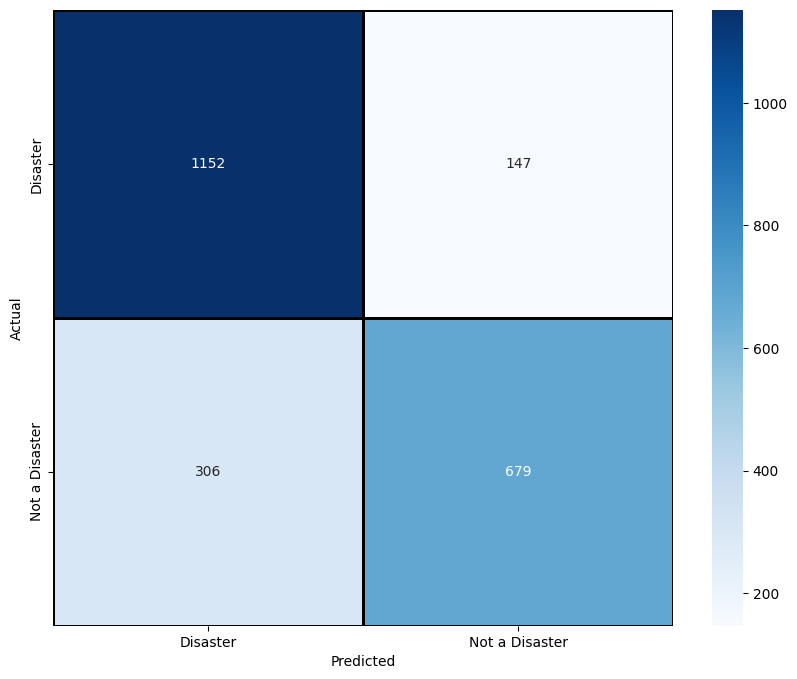

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix 

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,8))
sns.heatmap(cm,cmap= "Blues", 
            linecolor = 'black', 
            linewidth = 1, 
            annot = True, 
            fmt='', 
            xticklabels = classifier.classes_, 
            yticklabels = classifier.classes_)

plt.xlabel("Predicted")
plt.ylabel("Actual")

In [69]:
# accuracy score on the test data
from sklearn.linear_model import SGDClassifier

classifier = SGDClassifier(loss='log', penalty='l2',alpha=1e-3, random_state=667, max_iter=5, tol=None)
classifier.fit(X_train, y_train) 

y_pred = classifier.predict(X_test)
test_data_accuracy = accuracy_score(y_test,y_pred)
test_data_accuracy

0.7565674255691769

In [70]:
# Step 8: Pipeline Finale (nuovo train test split su dati raw tetuali)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3, 
                                                    random_state=667
                                                    )


from sklearn.pipeline import Pipeline

bow = CountVectorizer(max_features=1500, min_df=5, max_df=0.7)
tfidf = TfidfTransformer()
clf = classifier = MultinomialNB(alpha=0.1)

pipe = Pipeline([
                ('bow',bow),
                ('tfidf',tfidf),
                ('clf',clf),
                ])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

test_data_accuracy = accuracy_score(y_test,y_pred)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.8029772329246935


In [71]:
from sklearn.metrics import classification_report
#labels = ['class1', 'class2']
print(classification_report(y_test, y_pred))

                precision    recall  f1-score   support

      Disaster       0.79      0.89      0.84      1299
Not a Disaster       0.82      0.69      0.75       985

      accuracy                           0.80      2284
     macro avg       0.81      0.79      0.79      2284
  weighted avg       0.81      0.80      0.80      2284



Text(95.72222222222221, 0.5, 'Actual')

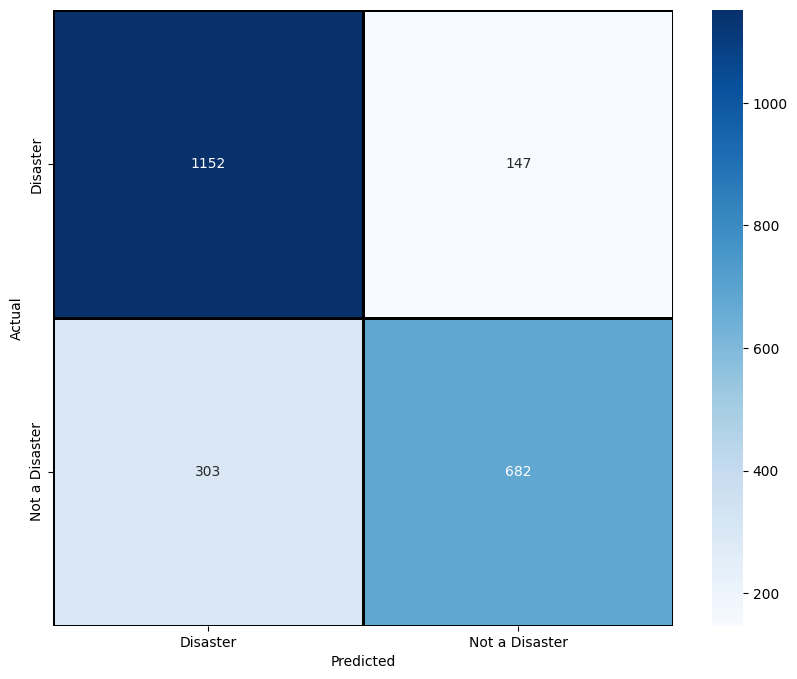

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix 

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,8))
sns.heatmap(cm,cmap= "Blues", 
            linecolor = 'black', 
            linewidth = 1, 
            annot = True, 
            fmt='', 
            xticklabels = classifier.classes_, 
            yticklabels = classifier.classes_)

plt.xlabel("Predicted")
plt.ylabel("Actual")

In [73]:
# Step 10: Cross Validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(pipe, X, y, scoring = 'f1_micro', cv = 8)

print(f'scores={scores}')
print(f'mean={np.mean(scores)}')
print(f'std={np.std(scores)}')

scores=[0.75105042 0.66596639 0.68067227 0.6302521  0.64495798 0.7192429
 0.71293375 0.74132492]
mean=0.6933000921188665
std=0.04171120464336519


In [74]:
import joblib
joblib.dump(pipe,'NLPEs3.pkl')

['NLPEs3.pkl']

In [75]:
import joblib

uploaded_model = joblib.load('NLPEs3.pkl')
pred = uploaded_model.predict(['storm is coming']) #
pred[0]

'Not a Disaster'